# Sección nueva

# Machine Learning Model for predicting customer conversion



In [ ]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
# Load the cleaned CSV files
train_df = pd.read_csv('cleaned_train.csv')
test_df = pd.read_csv('cleaned_test.csv')

# Display the first few rows of each DataFrame
print("Cleaned Train DataFrame:")
print(train_df.head())
print("\nCleaned Test DataFrame:")
print(test_df.head())


Cleaned Train DataFrame:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Cleaned Test DataFrame:
   age          job  marital  education default  balance hous

In [ ]:
# Merge the cleaned train and test DataFrames
df = pd.concat([train_df, test_df], ignore_index=True)
print("Merged DataFrame shape:", df.shape)

Merged DataFrame shape: (49732, 17)


In [ ]:
# Get a summary of the data
print(df.describe())

                age        balance           day      duration      campaign  \
count  49732.000000   49732.000000  49732.000000  49732.000000  49732.000000   
mean      40.957472    1367.761562     15.816315    258.690179      2.766549   
std       10.615008    3041.608766      8.315680    257.743149      3.099075   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    320.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  49732.000000  49732.000000  
mean      40.158630      0.576892  
std      100.127123      2.254838  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

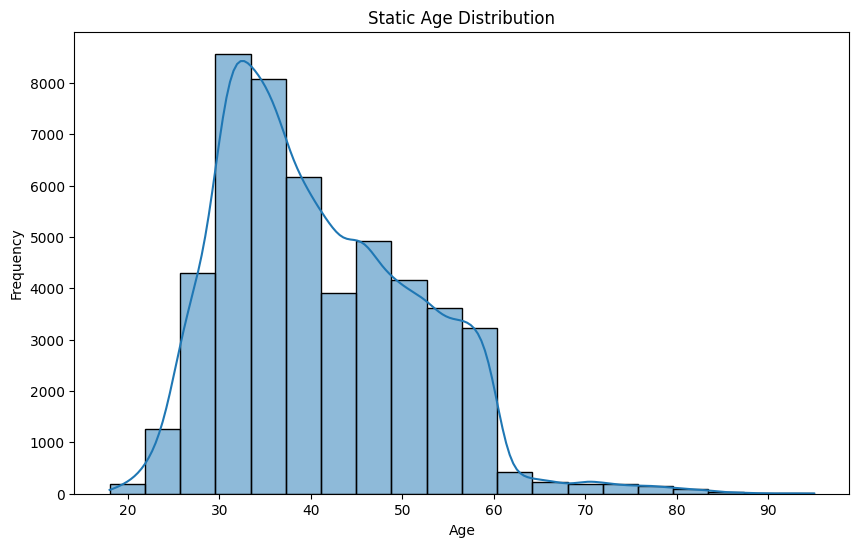

In [ ]:
# Plotting Csv DATA
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Static Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Create an interactive histogram of the 'age' column
fig = go.Figure(data=[go.Histogram(x=df['age'], nbinsx=20)])
fig.update_layout(
    title='Interactive Age Distribution',
    xaxis_title='Age',
    yaxis_title='Count'
)
fig.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Convert the target variable "y" to binary: 1 for "yes", 0 for "no"
df['y_binary'] = df['y'].map({'yes': 1, 'no': 0})

# Create a DataFrame for classification using selected features
df_clf = df[['age', 'balance', 'campaign', 'pdays', 'previous', 'y_binary']].dropna()

# Ensure that features are numeric
df_clf['age'] = pd.to_numeric(df_clf['age'], errors='coerce')
df_clf['balance'] = pd.to_numeric(df_clf['balance'], errors='coerce')
df_clf['campaign'] = pd.to_numeric(df_clf['campaign'], errors='coerce')
df_clf['pdays'] = pd.to_numeric(df_clf['pdays'], errors='coerce')
df_clf['previous'] = pd.to_numeric(df_clf['previous'], errors='coerce')
df_clf = df_clf.dropna()

# Define features (X) and target (y) for logistic regression
X_log = df_clf[['age', 'balance', 'campaign', 'pdays', 'previous']]
y_log = df_clf['y_binary']

# Split the data into training (80%) and testing (20%) sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_log, y_train_log)

# Make predictions on the test set
y_pred_log = log_reg.predict(X_test_log)

# Evaluate the Logistic Regression model
cm = confusion_matrix(y_test_log, y_pred_log)
accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log)
recall = recall_score(y_test_log, y_pred_log)
support = y_test_log.value_counts()

print("=== Logistic Regression Model ===")
print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nSupport (number of instances per class):")
print(support)


=== Logistic Regression Model ===
Confusion Matrix:
[[8782   14]
 [1150    1]]

Accuracy: 0.8829797929023826
Precision: 0.06666666666666667
Recall: 0.0008688097306689834

Support (number of instances per class):
y_binary
0    8796
1    1151
Name: count, dtype: int64


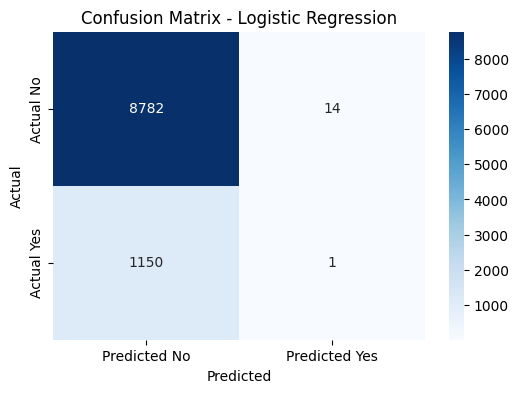

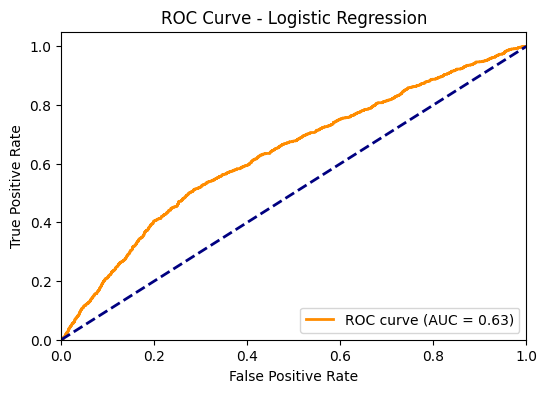

In [ ]:
from sklearn.metrics import roc_curve, auc

# ----- Plot Confusion Matrix -----
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# ----- Plot 2: ROC Curve -----
# Calculate predicted probabilities for the positive class
y_proba_log = log_reg.predict_proba(X_test_log)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_log, y_proba_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
# Decision Tree Classifier
# This model predicts client subscription to a term deposit.
# Convert the target variable "y" to binary: 1 for "yes", 0 for "no"
df['y_binary'] = df['y'].map({'yes': 1, 'no': 0})

# Create a simplified DataFrame for classification using only 'age' and 'balance'
df_simple = df[['age', 'balance', 'y_binary']].dropna()

# Ensure that 'age' and 'balance' are numeric
df_simple['age'] = pd.to_numeric(df_simple['age'], errors='coerce')
df_simple['balance'] = pd.to_numeric(df_simple['balance'], errors='coerce')
df_simple = df_simple.dropna()

# Define features (X) and target (y)
X = df_simple[['age', 'balance']]
y = df_simple['y_binary']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a basic Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
support = y_test.value_counts()

print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nSupport (number of instances per class):")
print(support)

# Optional: Visualize the decision tree
plt.figure(figsize=(8, 6))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Simple Decision Tree Visualization")
plt.show()


Confusion Matrix:
[[8100  696]
 [ 777  374]]

Accuracy: 0.8519151502965718
Precision: 0.34953271028037386
Recall: 0.32493483927019984

Support (number of instances per class):
y_binary
0    8796
1    1151
Name: count, dtype: int64
